#  House Prediction

![House](https://c1.staticflickr.com/7/6004/6192120777_ba9e648595_b.jpg)

### Importing necessary libraries

In [41]:
#importing libraries
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.kernel_ridge import KernelRidge
from tqdm import tqdm_notebook

In [42]:
os.getcwd()

'C:\\Users\\aaari\\Desktop\\Data Science\\project\\house prediction'

In [43]:
os.listdir()

['.ipynb_checkpoints',
 '.jovianrc',
 'house_pred.ipynb',
 'house_prediction_copy.ipynb',
 'kc_house_data.csv']

In [44]:
os.listdir()

['.ipynb_checkpoints',
 '.jovianrc',
 'house_pred.ipynb',
 'house_prediction_copy.ipynb',
 'kc_house_data.csv']

## Loading Datasets
This datasets is taken from Kaggle<br>
https://www.kaggle.com/harlfoxem/housesalesprediction

In [45]:
df=pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


From the above datasets. There are 21 columns.

In [46]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We can see all the data count, mean, std, min, 25%, 50%, 75% and max value of numberic columns.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [48]:
df.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

Here, we have about 21613 data with 21 columns and nowhere is empty value.

## Data Visulaziation

### Histograms

In [49]:
X=df.drop(['id','date','price'],axis=1)
y=df.price

<ipython-input-50-ede5d5a79e27>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(plot_data.columns)), desc = 'Generating Frequency Plots'):


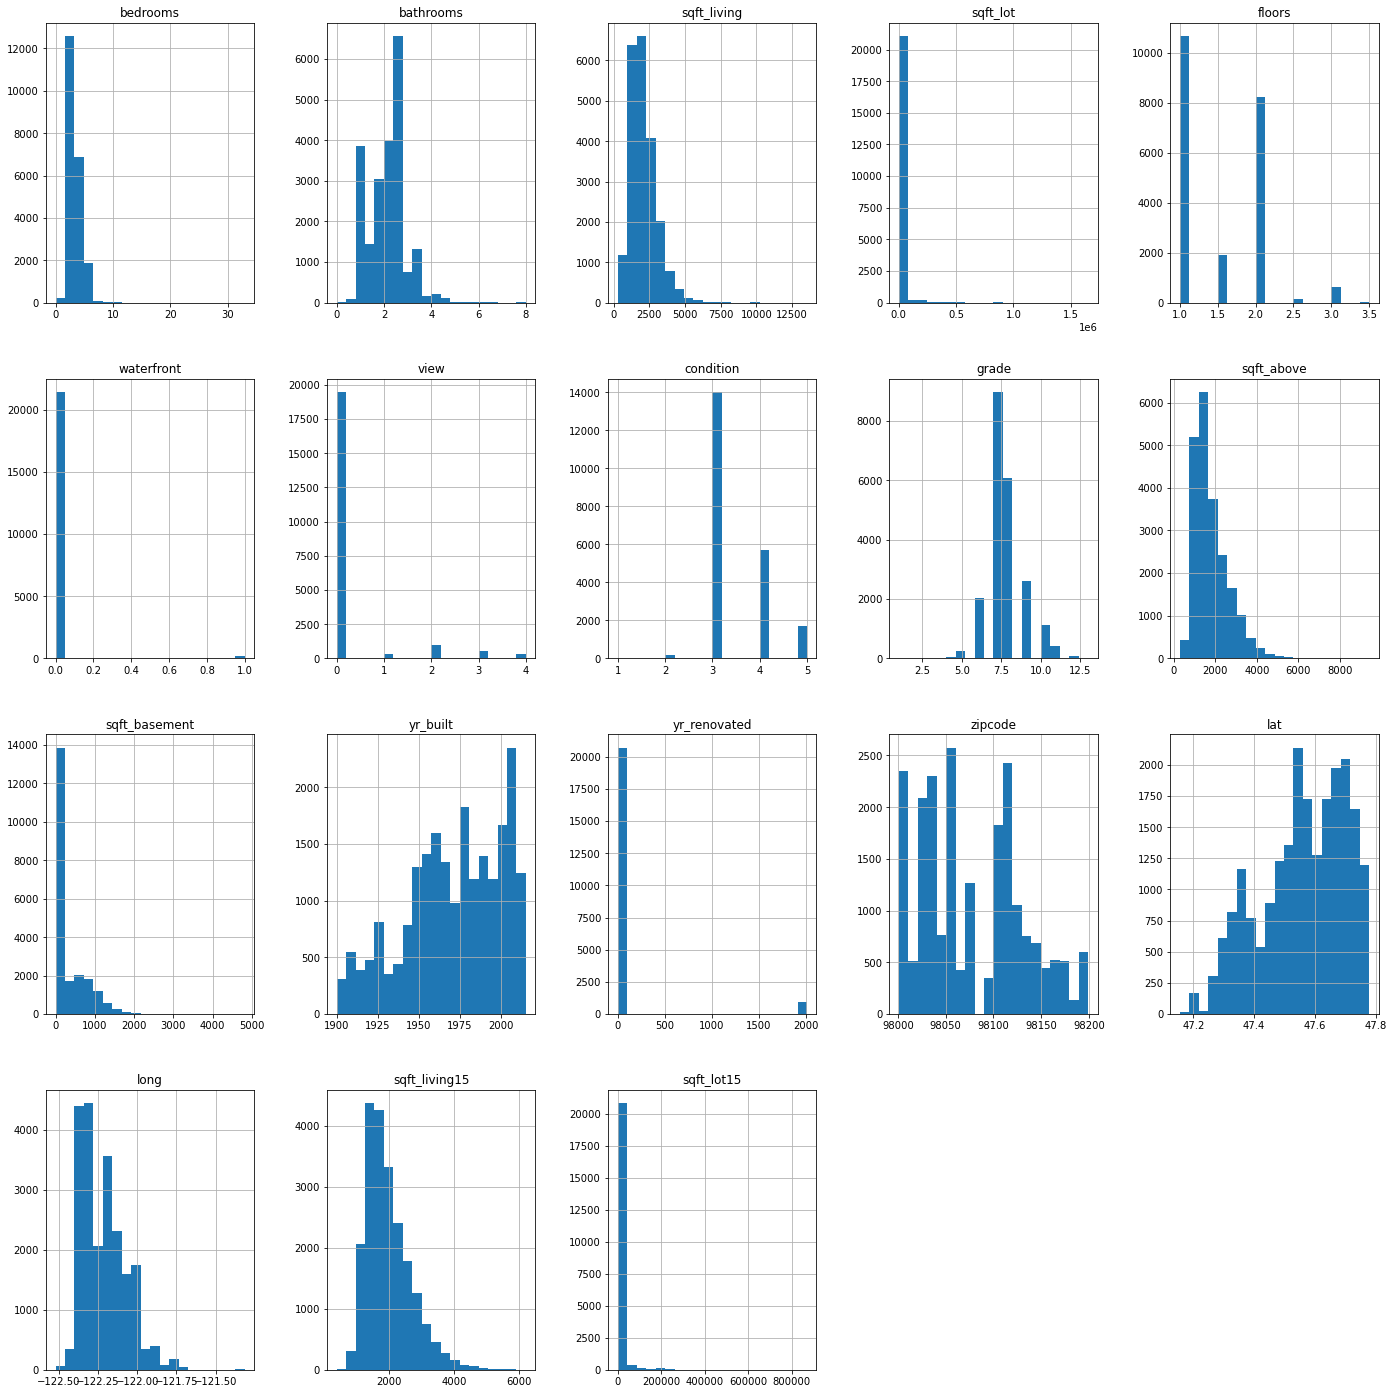

In [50]:
plot_data=X
fig = plt.figure(figsize=(20, 20))
for i in tqdm_notebook(range(len(plot_data.columns)), desc = 'Generating Frequency Plots'):
    fig.add_subplot(np.ceil(len(plot_data.columns)/5), 5, i+1)
    plot_data.iloc[:, i].hist(bins=20)
    plt.title(plot_data.columns[i])
    fig.tight_layout(pad=3.0)
plt.show();

From the above histogram:
We can see the each columns which values is maximum repeated and least repeated in the datasets.


### Distribution Plot

<ipython-input-51-4b4b29482bb1>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(dataset.columns)), desc = 'Generating Distribution Plots'):


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


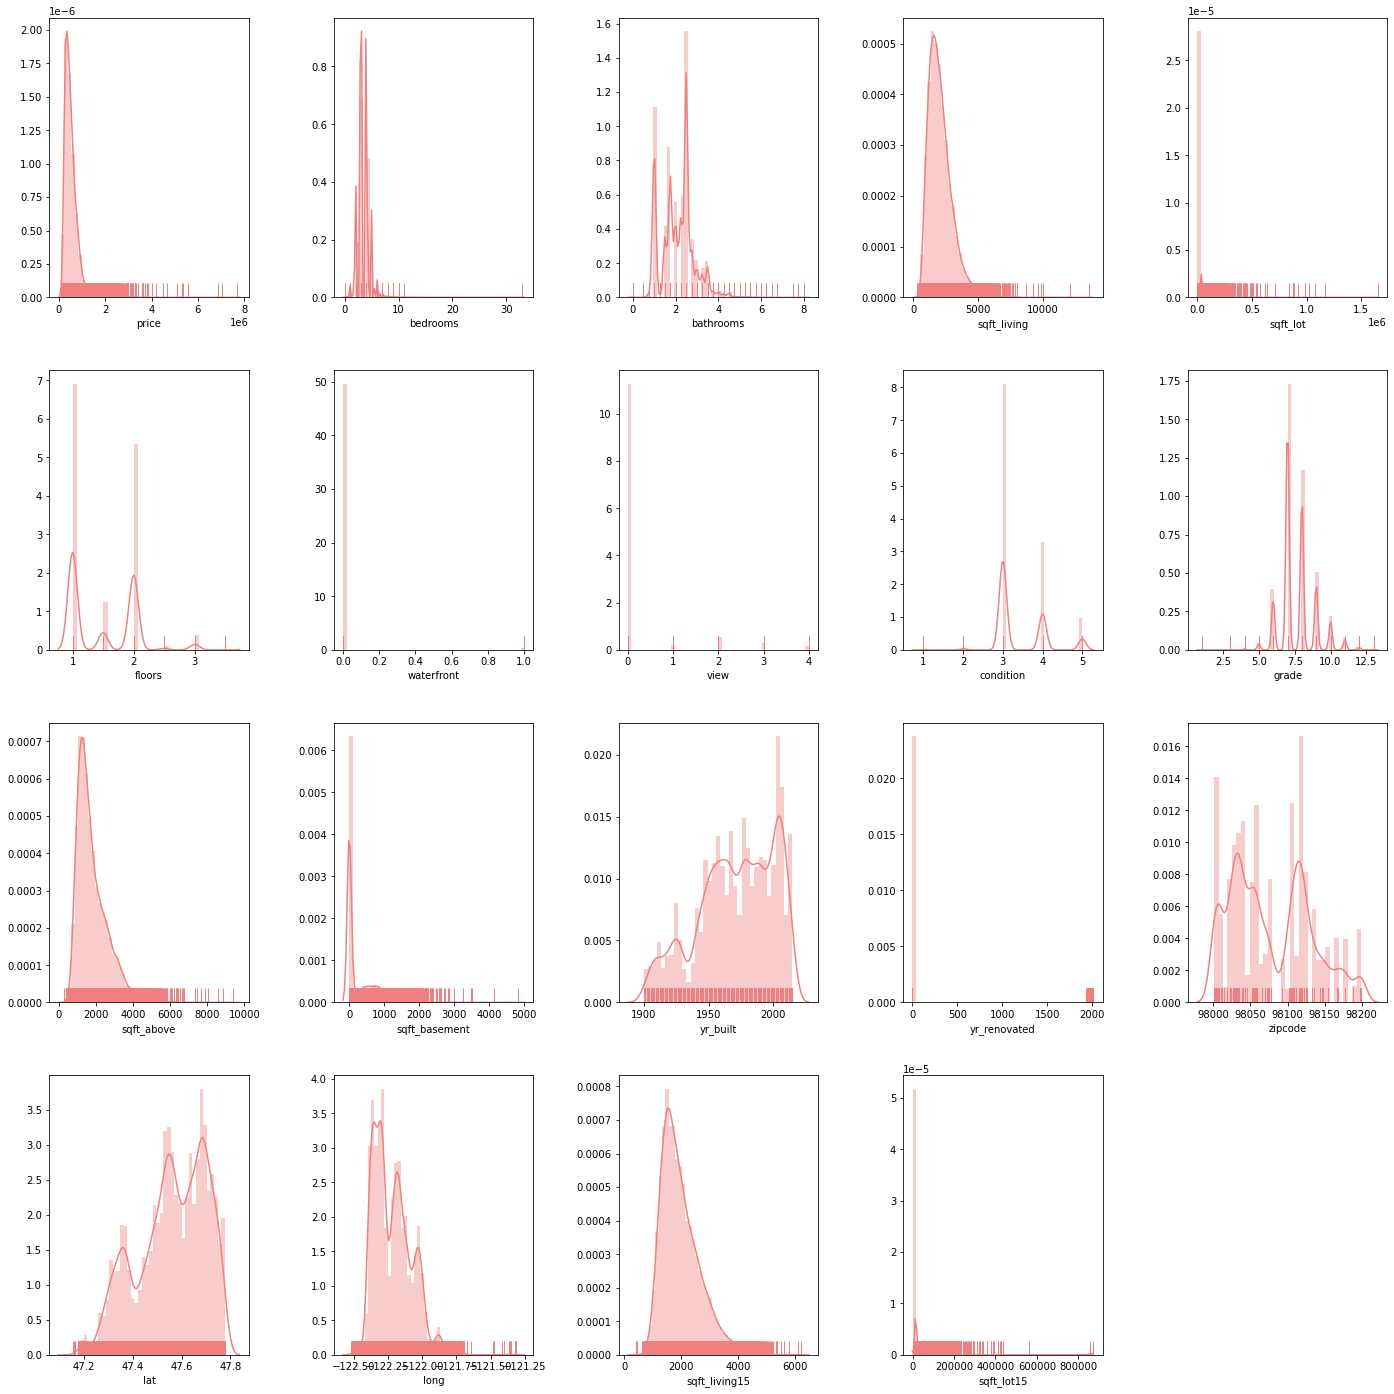

In [51]:
df_data=df.drop(['id','date'],axis=1)
def distributionPlot(dataset):
    """
    This function will create distribution plot for the dataset provided.
    """
    fig = plt.figure(figsize=(20, 20))
    for i in tqdm_notebook(range(len(dataset.columns)), desc = 'Generating Distribution Plots'):
        fig.add_subplot(np.ceil(len(dataset.columns)/5), 5, i+1)
        sns.distplot(
            dataset.iloc[:, i], color="lightcoral", rug=True)
        fig.tight_layout(pad=3.0)

distributionPlot(df_data)

From the above plot we can see the distributed plot of all the columns.

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.shape,X_test.shape

((17290, 18), (4323, 18))

### HeatMap

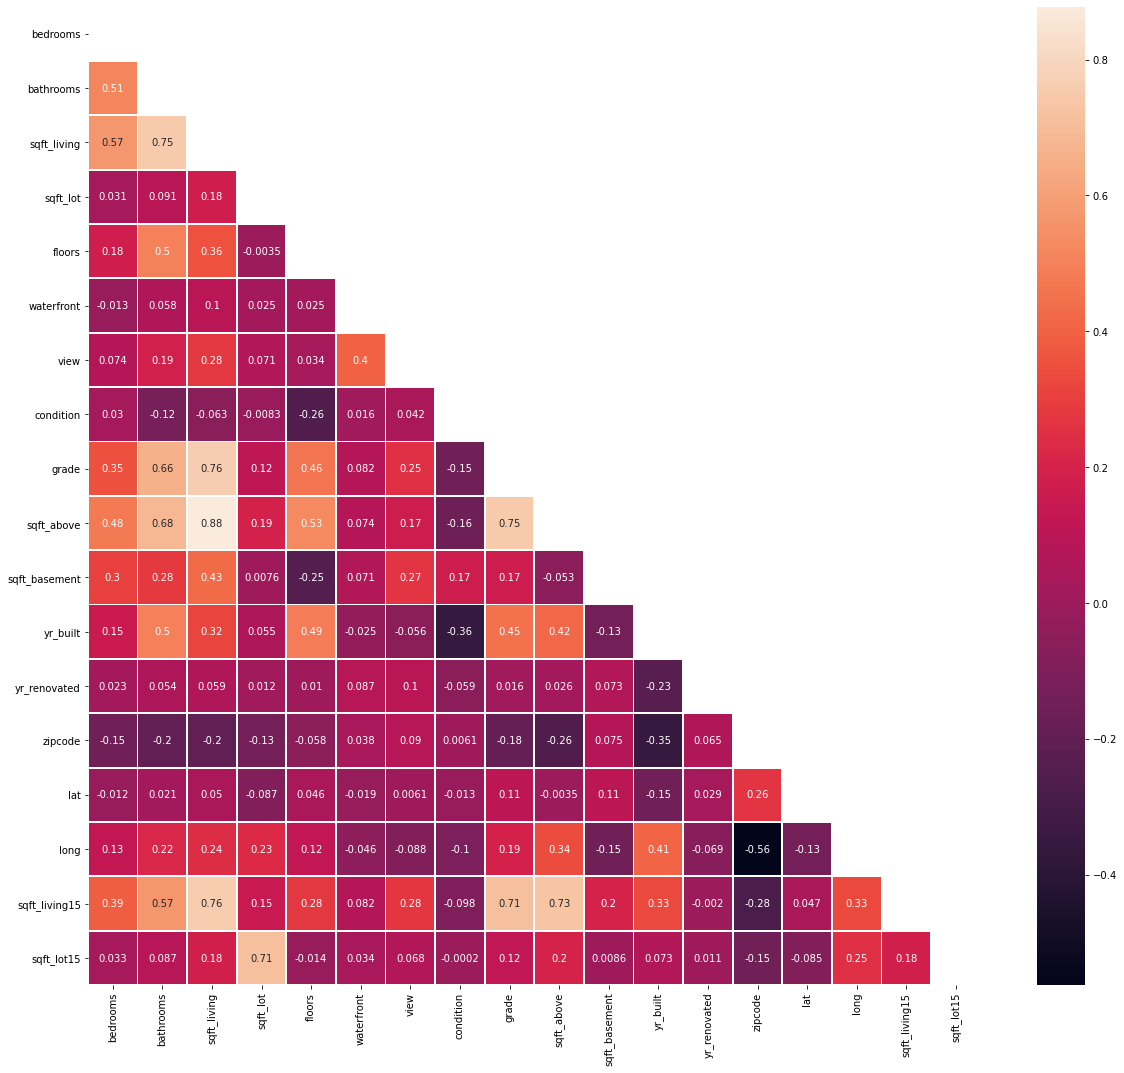

In [53]:
plt.figure(figsize=(20,18))
corr=X_train.corr()
matrix=np.triu(corr)
sns.heatmap(corr,annot=True,linewidth=0.8,mask=matrix,)
plt.show()

Here, we can glance at which columns are more correleated to eachother. 

In [54]:
def correlation(dataset,threshold):
    '''This function is used to removed the columns which are very closed to correlation.
    It's help to remove the function closed to correlation.'''
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i,j]))>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [55]:
corr_features=correlation(X_train,0.90)
corr_features

set()

# Features Selection

## Linear Regression

In [94]:
linear_reg=LinearRegression()
linear_reg

LinearRegression()

In [95]:
linear_reg.fit(X_train,y_train)

LinearRegression()

In [96]:
predicted_y=linear_reg.predict(X_test)
predicted_y

array([ 339244.50647807,  196193.89493127,  801691.89944485, ...,
       1647420.3696547 ,  456641.53841884,  328125.36622262])

In [97]:
a=linear_reg.score(X_test,y_test)
a

0.7141437245613471

In [98]:
mse=mean_squared_error(y_test,predicted_y)
rmse=np.sqrt(mse)
linear=['Linear',a,mse,rmse]
mse,rmse

(38442631078.84982, 196067.92465584425)

## Ridge

In [99]:
ridge_model=Ridge(alpha=0.1)
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.1)

In [100]:
ridge_predicted=ridge_model.predict(X_test)
ridge_predicted

array([ 339246.66264087,  196203.9477356 ,  801683.52799649, ...,
       1647431.6268831 ,  456672.7047585 ,  328160.05413661])

In [101]:
a=ridge_model.score(X_test,y_test)
a

0.714132981104262

In [102]:
mse=mean_squared_error(y_test,ridge_predicted)
rmse=np.sqrt(mse)
ridge=['Ridge',a,mse,rmse]
mse,rmse

(38444075884.483696, 196071.60907302133)

## Polynomial Regression

In [103]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
Input

[('scale', StandardScaler()),
 ('polynomial', PolynomialFeatures(include_bias=False)),
 ('model', LinearRegression())]

In [104]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [105]:
X_train=X_train.astype('float')
pipe.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [106]:
y_predict=pipe.predict(X_test)

In [107]:
a=pipe.score(X_test,y_test)
a

0.8166793403247145

In [108]:
mse=mean_squared_error(y_test,y_predict)
rmse=np.sqrt(mse)
polreg=['Polynomial',a,mse,rmse]
mse,rmse

(24653397859.515587, 157014.00529734787)

## Kernal Ridge

In [109]:
clf=KernelRidge(alpha=1)
clf

KernelRidge()

In [110]:
clf.fit(X_train,y_train)
clf

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.67109e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,


KernelRidge()

In [112]:
y_predicted=clf.predict(X_test)
y_predicted

array([ 343952.,  197248.,  799136., ..., 1646976.,  454240.,  334048.])

In [113]:
a=clf.score(X_test,y_test)
a

0.7138913667100746

In [114]:
mse=mean_squared_error(y_test,y_predicted)
rmse=np.sqrt(mse)
kr=['Kernal Ridge',a,mse,rmse]
mse,rmse

(38476568762.25885, 196154.4512935122)

## Which Model is the best?

In [115]:
data_score=pd.DataFrame([linear,ridge,polreg,kr])
data_score.rename(columns={0:'Model',1:'X_score',2:'MSE',3:'RMSE'},inplace=True)
data_score.set_index('Model',inplace=True)
data_score

,X_score,MSE,RMSE
Model,,,
Linear,0.714144,3.844263e+10,196067.924656
Ridge,0.714133,3.844408e+10,196071.609073
Polynomial,0.816679,2.465340e+10,157014.005297
Kernal Ridge,0.713891,3.847657e+10,196154.451294


From the above data. The `R^2` of `Polynomial Model` is best and `MSE` and `RMSE` is also loweset of this model. So, Polynomial Model is the `best model` for prediction of price of the house.